In [1]:
# create data frames
import pandas as pd
emailDf = pd.read_csv('email.csv')

#agg top 20 senders
agg = emailDf.groupby(by="Sender").sum().sort_values(["NumEmails"],ascending=False).head(20)

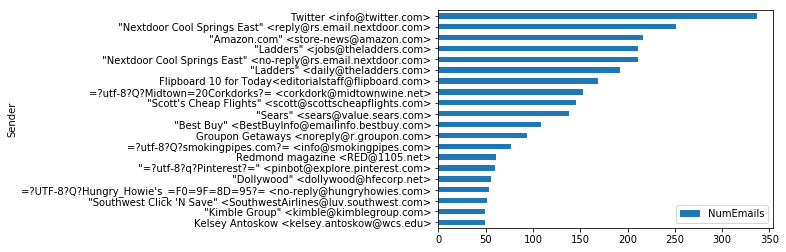

In [2]:
# show top senders
import matplotlib.pyplot as plt
agg.sort_values(["NumEmails"]).plot(kind='barh')
plt.show()

In [3]:
# aggregate by date and format date column
from datetime import datetime
emailDf2 = emailDf[['Received','NumEmails']].copy()
emailDf2["Received"] =pd.to_datetime(emailDf["Received"]).dt.date
emailDf2 = emailDf2.groupby(by="Received").sum()

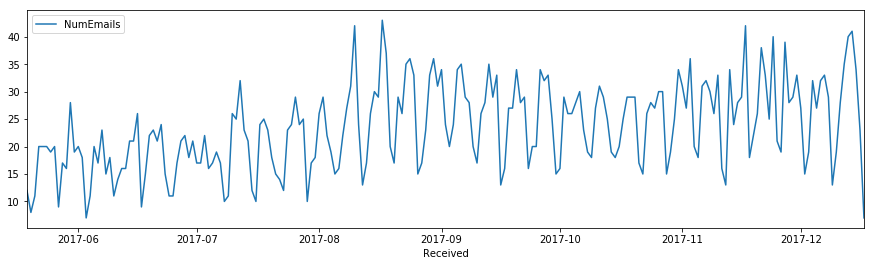

In [4]:
emailDf2.plot(figsize=(15,4))
plt.show()

In [40]:
df3 = emailDf2.copy()
df3.reset_index(inplace=True)
df3['dow'] = pd.to_datetime(df3.Received).dt.weekday.astype('str') 
# + '-' + pd.to_datetime(df3.Received).dt.weekday_name
df3.rename(columns={'NumEmails':'actEmails'},inplace=True)
df3.head()

,Received,actEmails,dow
0,2017-05-19,12,4
1,2017-05-20,8,5
2,2017-05-21,11,6
3,2017-05-22,20,0
4,2017-05-23,20,1


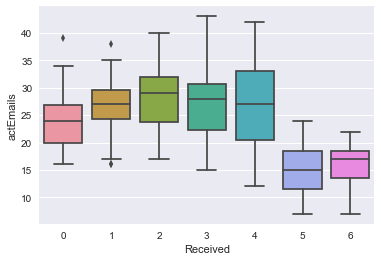

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

sns.boxplot(pd.to_datetime(df3.Received).dt.weekday,df3.actEmails)

In [13]:
#ordinary least squares
import statsmodels.formula.api as sm
result = sm.ols(formula="actEmails ~ dow",data=df3).fit()

In [39]:
# result.params
# print(result.summary())

In [42]:
df3['forecastEmails']=result.predict()
df3.head(8)

,Received,actEmails,dow,forecastEmails
0,2017-05-19,12,4,26.612903
1,2017-05-20,8,5,15.129032
2,2017-05-21,11,6,15.806452
3,2017-05-22,20,0,24.300000
4,2017-05-23,20,1,26.800000
5,2017-05-24,20,2,28.633333
6,2017-05-25,19,3,27.466667
7,2017-05-26,20,4,26.612903


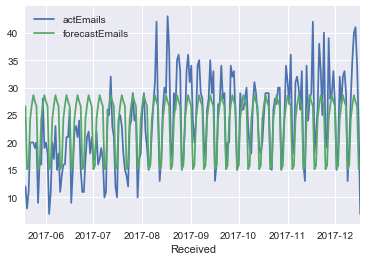

In [56]:
df4 = df3.set_index('Received')
df4.plot()
plt.show()

In [58]:
df4.head()

,actEmails,dow,forecastEmails
Received,,,
2017-05-19,12,4,26.612903
2017-05-20,8,5,15.129032
2017-05-21,11,6,15.806452
2017-05-22,20,0,24.300000
2017-05-23,20,1,26.800000


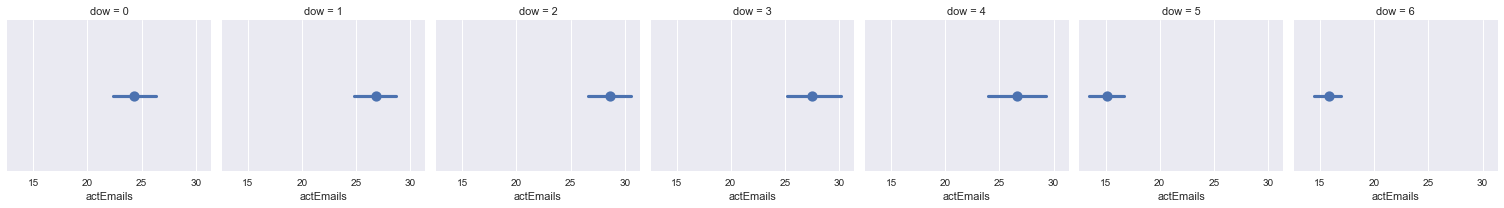

In [59]:
g = sns.FacetGrid(df4,col='dow')
g.map(sns.pointplot,'actEmails')